In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Question 1

## First Order Moments

\begin{align*}
E[X] &= E[\mu_X + \sigma_A A]\\
&= E[\mu_X]+E[\sigma_A A]\\
&=\mu_X + \sigma_AE[A]\\
&=\mu_X
\end{align*}

where we used the linearity properties of the expectation value operator and the fact that $E[A]=0$.

\begin{align*}
E[Y] &= E[\mu_Y + \sigma_A A+\sigma_B B]\\
&= E[\mu_Y]+E[\sigma_A A]+E[\sigma_B B]\\
&=\mu_Y + \sigma_AE[A]+\sigma_B E[B]\\
&=\mu_Y
\end{align*}

## Second Order Moments

\begin{align*}
E[X^2] &= E[\mu_X^2]+2E[\mu_X\sigma_A A] + E[\sigma_A^2 A^2]\\
&= \mu_X^2 + 2\mu_X\sigma_A E[A] + \sigma_A^2 E[A^2]
\end{align*}

Now using the fact that $E[A]=0$ and $1 = E[A^2]-E[A]^2 = E[A^2]$ (A is normally distributed with standard deviation 1) we have

\begin{align*}
E[X^2] &= \mu_X^2 + \sigma_A^2 \\
&= \mu_X^2 + \sigma_A^2\\
\end{align*}

We also have

\begin{align*}
E[Y^2] &= E[\mu_Y^2+\sigma_A^2A^2+\sigma_B^2B^2+2\mu_Y\sigma_A A + 2 \mu_y \sigma_B B + 2\sigma_A\sigma_B A B] \\
&=\mu_Y^2+\sigma_A^2E[A^2]+\sigma_B^2E[B^2]+2\mu_y\sigma_AE[A]+2\mu_y\sigma_BE[B]+2\sigma_A\sigma_bE[AB]\\
&=\mu_Y^2+\sigma_A^2+\sigma_B^2
\end{align*}
where we have used the fact that $E[A^2]=E[B^2]=1$, $E[A]=E[B]=0$, and finally that $\text{cov}[A,B]=E[(A-E[A])(B-E[B])]=E[AB]=0$ since $A$ and $B$ are assumed indepedent (and thus uncorrelated). We also have

\begin{align*}
E[XY]&=E[(\mu_X+\sigma_A A)(\mu_y +\sigma_A A + \sigma_B B)]\\
&=E[\mu_X\mu_Y+\mu_X\sigma_A A + \mu_X \sigma_B B + \mu_Y \sigma_A A + \sigma_A^2 A^2 + \sigma_A \sigma_B AB]\\
&=\mu_X\mu_y+\sigma_A^2
\end{align*}

where once again we have used the linearity properties of the expectation value operator and the fact that $E[A^2]=E[B^2]=1$, $E[A]=E[B]=0$, and $E[AB]=0$.


## Variances, Covariance, and Correlation Coefficient

Since we have now computed all the first and second order moments, we can compute the desired quantities

### Variances

Variance of $X$

\begin{align*}
\sigma_X^2 &= E[X^2]-E[X]^2\\
&=\mu_X^2+\sigma_A^2-\mu_X^2\\
&=\sigma_A^2
\end{align*}

Variance of $Y$

\begin{align*}
\sigma_Y^2 &= E[Y^2]-E[Y]^2\\
&=\mu_Y^2+\sigma_A^2+\sigma_B^2-\mu_Y^2\\
&=\sigma_A^2+\sigma_B^2
\end{align*}

### Covariance

\begin{align*}
\text{cov[X,Y]} &= E[(X-\mu_X)(Y-\mu_Y)]\\
&= E[XY]-\mu_YE[X]-\mu_XE[Y]+\mu_X\mu_Y\\
&=E[XY]-\mu_X\mu_y\\
&=\sigma_A^2
\end{align*}

### Correlation Coefficient

\begin{align*}
\rho_{XY} &= \frac{\text{cov}[X,Y]}{\sigma_X\sigma_Y}\\
&=\frac{\sigma_A^2}{\sigma_A\sqrt{\sigma_A^2+\sigma_B^2}}\\
&=\frac{1}{\sqrt{1+(\sigma_B/\sigma_A)^2}}
\end{align*}

# Question 2

In [2]:
def getSample(n, ux=1, uy=1, sA=1, sB=1):
    norm1 = np.random.randn(n)
    norm2 = np.random.randn(n)
    X = ux + sA*norm1
    Y = uy + sA*norm1+sB*norm2
    return X,Y

# Question 3

In [33]:
ux = 3
uy = 3
sA= 3
sB = 2

In [34]:
x, y = getSample(20, ux=ux, uy=uy, sA=sA, sB=sB)

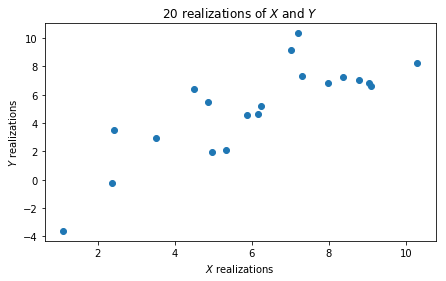

In [4]:
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(x,y)
ax.set_xlabel('$X$ realizations')
ax.set_ylabel('$Y$ realizations')
ax.set_title('20 realizations of $X$ and $Y$')
plt.show()

Each coefficient can be found explicitly or by using methods in the numpy package. We show both here.

## Sample Means

Explicitly...

In [5]:
ux = np.sum(x)/len(x)
uy = np.sum(y)/len(y)
print('Mean of X realizations: {}'.format(ux))
print('Mean of Y realizations: {}'.format(uy))

Mean of X realizations: 6.121552892086987
Mean of Y realizations: 5.130417435461938


Using python functions...

In [6]:
ux = np.mean(x)
uy = np.mean(y)
print('Mean of X realizations: {}'.format(ux))
print('Mean of Y realizations: {}'.format(uy))

Mean of X realizations: 6.121552892086987
Mean of Y realizations: 5.130417435461938


## Sample Variances and Covariance

### Variance

Explicitly:

In [7]:
Vx = np.sum((x-ux)**2)/(len(x)-1)
Vy = np.sum((y-uy)**2)/(len(y)-1)
print('Variance of X realizations: {}'.format(Vx))
print('Variance of Y realizations: {}'.format(Vy))

Variance of X realizations: 6.315257554854236
Variance of Y realizations: 10.931031944174208


Using numpy functionality:

In [8]:
Vx = np.var(x, ddof=1)
Vy = np.var(y, ddof=1)
print('Variance of X realizations: {}'.format(Vx))
print('Variance of Y realizations: {}'.format(Vy))

Variance of X realizations: 6.315257554854236
Variance of Y realizations: 10.931031944174208


### Covariance

Explicitly:

In [9]:
cov = np.sum((x-ux)*(y-uy))/(len(x)-1)
print('Covariance of X and Y: {}'.format(cov))

Covariance of X and Y: 6.677392337854559


Using numpy functionality:

In [10]:
cov = np.cov(x,y)[0,1]
print('Covariance of X and Y: {}'.format(cov))

Covariance of X and Y: 6.677392337854557


### Correlation Coefficient

Explicitly:

In [11]:
cov = np.sum((x-ux)*(y-uy))/(len(x)-1)
Vx = np.sum((x-ux)**2)/(len(x)-1)
Vy = np.sum((y-uy)**2)/(len(y)-1)
corr_coef = cov/np.sqrt(Vx*Vy)
print('Correlation between X and Y: {}'.format(corr_coef))

Correlation between X and Y: 0.8036755927191758


Using numpy funtionality:

In [12]:
corr_coef = np.corrcoef(x,y)[0,1]
print('Correlation between X and Y: {}'.format(corr_coef))

Correlation between X and Y: 0.8036755927191758


# Question 4

Define a function that computes the correlation coefficient given x and y

In [13]:
def get_corrcoef(x,y):
    return np.corrcoef(x,y)[0,1]

Compute many correlation coefficients for many samples. Here the sample size is 20.

In [14]:
corr_coeffs = np.array([get_corrcoef(*getSample(20, ux=5, uy=4, sA=3, sB=2)) \
                       for i in range(1000) ])
bins = np.arange(0, 1, 0.02)
cc_mean = np.mean(corr_coeffs)
cc_std = np.std(corr_coeffs)

Make a plot.

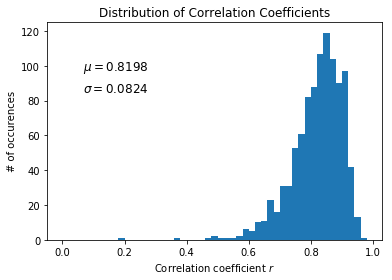

In [15]:
plt.hist(corr_coeffs, bins=bins)
plt.ylabel('# of occurences')
plt.xlabel('Correlation coefficient $r$')
plt.text(0.05, 0.8, r'$\mu={:.4f}$'.format(cc_mean), fontsize=12, transform=ax.transAxes)
plt.text(0.05, 0.7, r'$\sigma={:.4f}$'.format(cc_std), fontsize=12, transform=ax.transAxes)
plt.title('Distribution of Correlation Coefficients')
plt.show()

# Question 5

Compute many correlation coefficients for many samples. Here the sample size is 200.

In [16]:
corr_coeffs = np.array([get_corrcoef(*getSample(200, ux=5, uy=4, sA=3, sB=2)) \
                       for i in range(1000) ])
bins = np.arange(0, 1, 0.02)
cc_mean = np.mean(corr_coeffs)
cc_std = np.std(corr_coeffs)

Make a plot.

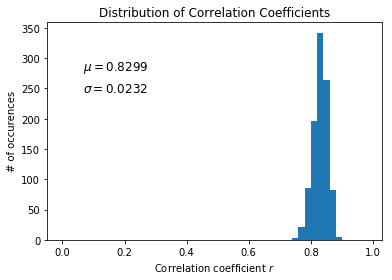

In [17]:
plt.hist(corr_coeffs, bins=bins)
plt.ylabel('# of occurences')
plt.xlabel('Correlation coefficient $r$')
plt.text(0.05, 0.8, r'$\mu={:.4f}$'.format(cc_mean), fontsize=12, transform=ax.transAxes)
plt.text(0.05, 0.7, r'$\sigma={:.4f}$'.format(cc_std), fontsize=12, transform=ax.transAxes)
plt.title('Distribution of Correlation Coefficients')
plt.show()

# A Neat Extension to These Problems

Lets create an animation to see how this changes in real time. I'll send you an email that includes the video.

For extra clarity, 10 times as many data points and bins were used for each plot in the animation. Since getSample is now called approxmately 1 million times, the code takes approximately 2 minutes to run.

Here we have a animation function, which is always used when creating animations in matplotlib. The parameter "i" specifies the frame number. In this case, the thing that changes is the number of data points created in the getSample function.

In [58]:
def animate(i):
    corr_coeffs = np.array([get_corrcoef(*getSample((i+1)*10, ux=5, uy=4, sA=3, sB=2)) \
                       for j in range(10000) ])
    bins = np.arange(0, 1, 0.002)
    cc_mean = np.mean(corr_coeffs)
    cc_std = np.std(corr_coeffs)
    
    ax.clear()
    ax.hist(corr_coeffs, bins=bins)
    ax.set_ylabel('# of occurences')
    ax.set_xlabel('Correlation coefficient $r$')
    ax.text(0.05, 0.8, r'$\mu={:.4f}$'.format(cc_mean), fontsize=12, transform=ax.transAxes)
    ax.text(0.05, 0.7, r'$\sigma={:.4f}$'.format(cc_std), fontsize=12, transform=ax.transAxes)
    ax.set_title('Distribution of Correlation Coefficients')

Here we use the animation to generate a plot. When saving the plot, we specifify how many frames per second will be displayed in the mp4 file.

In [59]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ani = animation.FuncAnimation(fig,animate,80)
ani.save('testvid.mp4', fps=4)
plt.close()

# Question 6

Here we take $N=1000$ occurences of $r$ for a sample size of $n=20$.

In [53]:
n = 20
N=1000

Compute the correlation coefficients and then get an array of values of $\tanh^{-1}(r)$. These are distributed according to a Gaussian pdf. Also get the bins used in the histogram.

In [69]:
corr_coeffs = np.array([get_corrcoef(*getSample(n, ux=5, uy=4, sA=3, sB=2)) \
                       for i in range(N) ])
z = np.arctanh(corr_coeffs)
z_mean = np.mean(z)
z_std = np.std(z)
bins = np.arange(0, 2, 0.1)

Obtain the theoretical Gaussian pdf with expectation value

$$E[Z] = \tanh^{-1}(\rho)+\frac{\rho}{2(n-1)}$$

and variance

$$V[Z]=\frac{1}{n-3}$$

which describes the distribution of the $\tanh^{-1}(r)$ values.

In [60]:
def gaussian_pdf(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2 / (2*sigma**2))

rho = 1/np.sqrt(1+(sB/sA)**2)
mu = np.arctanh(rho)+rho/(2*(n-1))
sigma = np.sqrt(1/(n-3))

x = np.linspace(0,2,1000)
y = gaussian_pdf(x,mu,sigma)

Plot.

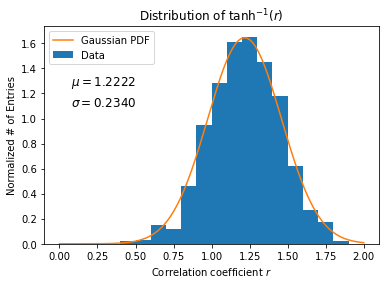

In [70]:
plt.hist(z, bins=bins, density=True, label='Data')
plt.plot(x,y, label='Gaussian PDF')
plt.ylabel('Normalized # of Entries')
plt.xlabel('Correlation coefficient $r$')
plt.text(0.02, 0.75, r'$\mu={:.4f}$'.format(z_mean), fontsize=12, transform=ax.transAxes)
plt.text(0.02, 0.65, r'$\sigma={:.4f}$'.format(z_std), fontsize=12, transform=ax.transAxes)
plt.title(r'Distribution of $\tanh^{-1}(r)$')
plt.legend()
plt.show()

In [71]:
print('Sample Mean: {}'.format(z_mean))
print('True Mean: {}'.format(mu))

Sample Mean: 1.2222301952455352
True Mean: 1.2166592776644212


In [72]:
print('Sample standard deviation: {}'.format(z_std))
print('True standard deviation: {}'.format(sigma))

Sample standard deviation: 0.23404844368861094
True standard deviation: 0.24253562503633297


It is worth noting that for finite sample sizes $n$, $z=\tanh^{-1}(r)$ is a biased estimator for $\tanh^{-1}(\rho)$ (which related to the true correlation coefficient). Note that this is taken into account in the plot above since we also include the $\frac{\rho}{2(n-1)}$ factor.